In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

# EM

### MSstats

In [3]:
quantms_em_protein_expression = pd.read_csv("./MSstats_output-quantms-EM-proteinIntensity.csv", header=0, sep=",")

msstats_em_cv = pd.DataFrame(None,columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3', 'TechRep4', 'TechRep5', 'TechRep6', 'Type', "CV[%]", "Condition"])
for condition, group_condition in quantms_em_protein_expression.groupby("GROUP"):
    for protein, t_sum in group_condition.groupby("Protein"):
        if len(t_sum) < 3:
            continue
        TechRep1 = np.NaN
        TechRep2 = np.NaN
        TechRep3 = np.NaN
        TechRep4 = np.NaN
        TechRep5 = np.NaN
        TechRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if row["originalRUN"] == 1 or row["originalRUN"] == 7 or row["originalRUN"] == 13:
                TechRep1 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 2 or row["originalRUN"] == 8 or row["originalRUN"] == 14:
                TechRep2 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 3 or row["originalRUN"] == 9 or row["originalRUN"] == 15:
                TechRep3 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 4 or row["originalRUN"] == 10 or row["originalRUN"] == 16:
                TechRep4 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 5 or row["originalRUN"] == 11 or row["originalRUN"] == 17:
                TechRep5 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 6 or row["originalRUN"] == 12 or row["originalRUN"] == 18:
                TechRep6 = np.exp2(row["LogIntensities"])
        condition = condition.replace("SP=Yeast;CT=Mixture;QY=", "")
        mean = np.nanmean([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        std = np.nanstd([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        msstats_em_cv = msstats_em_cv.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, "TechRep4": TechRep4, "TechRep5": TechRep5, "TechRep6": TechRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "MSstats", "Condition": condition}, ignore_index=True)

### Proteus

In [4]:
import re

prodatmed = pd.read_csv("./proteus-quantms-EM-proteinIntensity.csv", index_col=0)

def return_techrep(row):
    return row["MS runs"].replace("TechRep", "").split("_")[-1]

prodatmed = prodatmed.reset_index() #将索引转化为Series
prodatmed_long = prodatmed.melt(id_vars=["index"])
prodatmed_long.rename(columns={"index": "ProteinName", "variable": "MS runs", "value": "Intensity"}, inplace=True)
prodatmed_long.dropna(how="any", inplace=True)
prodatmed_long["TechRep"] = prodatmed_long.apply(lambda x: return_techrep(x), axis=1)
prodatmed_long["Condition"] = prodatmed_long.apply(lambda x: x["MS runs"].split("_")[0], axis=1)

In [5]:
for condition, group_condition in prodatmed_long.groupby("Condition"):
    for protein, t_sum in group_condition.groupby("ProteinName"):
        if len(t_sum) < 3:
            continue
        TechRep1 = np.NaN
        TechRep2 = np.NaN
        TechRep3 = np.NaN
        TechRep4 = np.NaN
        TechRep5 = np.NaN
        TechRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if str(row["TechRep"]) == "1":
                TechRep1 = row["Intensity"]
            elif str(row["TechRep"]) == "2":
                TechRep2 = row["Intensity"]
            elif str(row["TechRep"]) == "3":
                TechRep3 = row["Intensity"]
            elif str(row["TechRep"]) == "4":
                TechRep4 = row["Intensity"]
            elif str(row["TechRep"]) == "5":
                TechRep5 = row["Intensity"]
            elif str(row["TechRep"]) == "6":
                TechRep6 = row["Intensity"]

        mean = np.nanmean([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        std = np.nanstd([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        msstats_em_cv = msstats_em_cv.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, "TechRep4": TechRep4, "TechRep5": TechRep5, "TechRep6": TechRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "Proteus", "Condition": condition}, ignore_index=True)

### msqrob2

In [6]:
msqrob2 = pd.read_csv("msqrob2-protein-intensity-CM.csv")
msqrob2 = msqrob2.melt(id_vars="ProteinName")
def put_condition(v):
    if v == "sumIntensity_1" or v == "sumIntensity_2" or v == "sumIntensity_3" or v == "sumIntensity_4"or v == "sumIntensity_5"or v == "sumIntensity_6":
        return "dilution 1"
    elif v == "sumIntensity_7" or v == "sumIntensity_8" or v == "sumIntensity_9"or v == "sumIntensity_10"or v == "sumIntensity_11"or v == "sumIntensity_12":
        return "dilution 4"
    else:
        return "dilution 10"

def convert_variable(v):
    if v == "sumIntensity_1" or v == "sumIntensity_7" or v == "sumIntensity_13":
        return "TechRep1"
    elif v == "sumIntensity_2" or v == "sumIntensity_8" or v == "sumIntensity_14":
        return "TechRep2"
    elif v == "sumIntensity_3" or  v == "sumIntensity_9"or v == "sumIntensity_15":
        return "TechRep3"
    elif v == "sumIntensity_4" or v == "sumIntensity_10"or v == "sumIntensity_16":
        return "TechRep4"
    elif v == "sumIntensity_5" or  v == "sumIntensity_11"or v == "sumIntensity_17":
        return "TechRep5"
    else:
        return "TechRep6"
    
msqrob2["Condition"] = msqrob2.apply(lambda x: put_condition(x["variable"]) ,axis=1)
msqrob2["variable"] = msqrob2.apply(lambda x: convert_variable(x["variable"]) ,axis=1)

msqrob2 = msqrob2.pivot_table(index=["ProteinName", "Condition"], columns=["variable"], values="value").reset_index()
msqrob2.dropna(thresh=3, subset=["TechRep1", "TechRep2","TechRep3", "TechRep4", "TechRep5", "TechRep6"], inplace=True, axis=0)

In [7]:
def get_cv(row):
    t = 100*np.nanstd([row["TechRep1"],row["TechRep2"], row["TechRep3"],row["TechRep4"],row["TechRep5"],row["TechRep6"]]) /abs(np.nanmean([row["TechRep1"],row["TechRep2"],row["TechRep3"],row["TechRep4"], row["TechRep5"],row["TechRep6"]]))
    return t
        
msqrob2["CV[%]"] =  msqrob2.apply(lambda r: get_cv(r), axis=1)
msqrob2["Type"] = "msqrob2"

In [8]:
msstats_em_cv["Condition"] = msstats_em_cv.apply(lambda x: "dilution " + str(x["Condition"]), axis=1)
msstats_em_cv = msstats_em_cv.append(msqrob2)

# 删除行中带有负数的行
msstats_em_cv = msstats_em_cv[msstats_em_cv.select_dtypes(include=[np.number]).ge(0).all(1)]

In [9]:
msstats_em_cv.head()

,ProteinName,TechRep1,TechRep2,TechRep3,TechRep4,TechRep5,TechRep6,Type,CV[%],Condition
0,sp|A0FGR8|ESYT2_HUMAN,5.566805e+06,1.266373e+07,1.364520e+07,7.272344e+06,8.300866e+06,1.064534e+07,MSstats,29.866461,dilution 1
1,sp|A0JNW5|UH1BL_HUMAN,8.477262e+06,7.980681e+06,8.493321e+06,7.664693e+06,8.413788e+06,6.546314e+06,MSstats,8.674119,dilution 1
2,sp|A0MZ66|SHOT1_HUMAN,2.829278e+07,3.251681e+07,3.059080e+07,2.880495e+07,2.726178e+07,2.833758e+07,MSstats,5.969151,dilution 1
3,sp|A1L390|PKHG3_HUMAN,3.152724e+07,2.613629e+07,2.642302e+07,2.355262e+07,2.583417e+07,1.502647e+07,MSstats,20.053898,dilution 1
4,sp|A7KAX9|RHG32_HUMAN,2.782256e+07,2.350018e+07,2.229146e+07,2.311904e+07,1.948582e+07,2.734355e+07,MSstats,12.074690,dilution 1


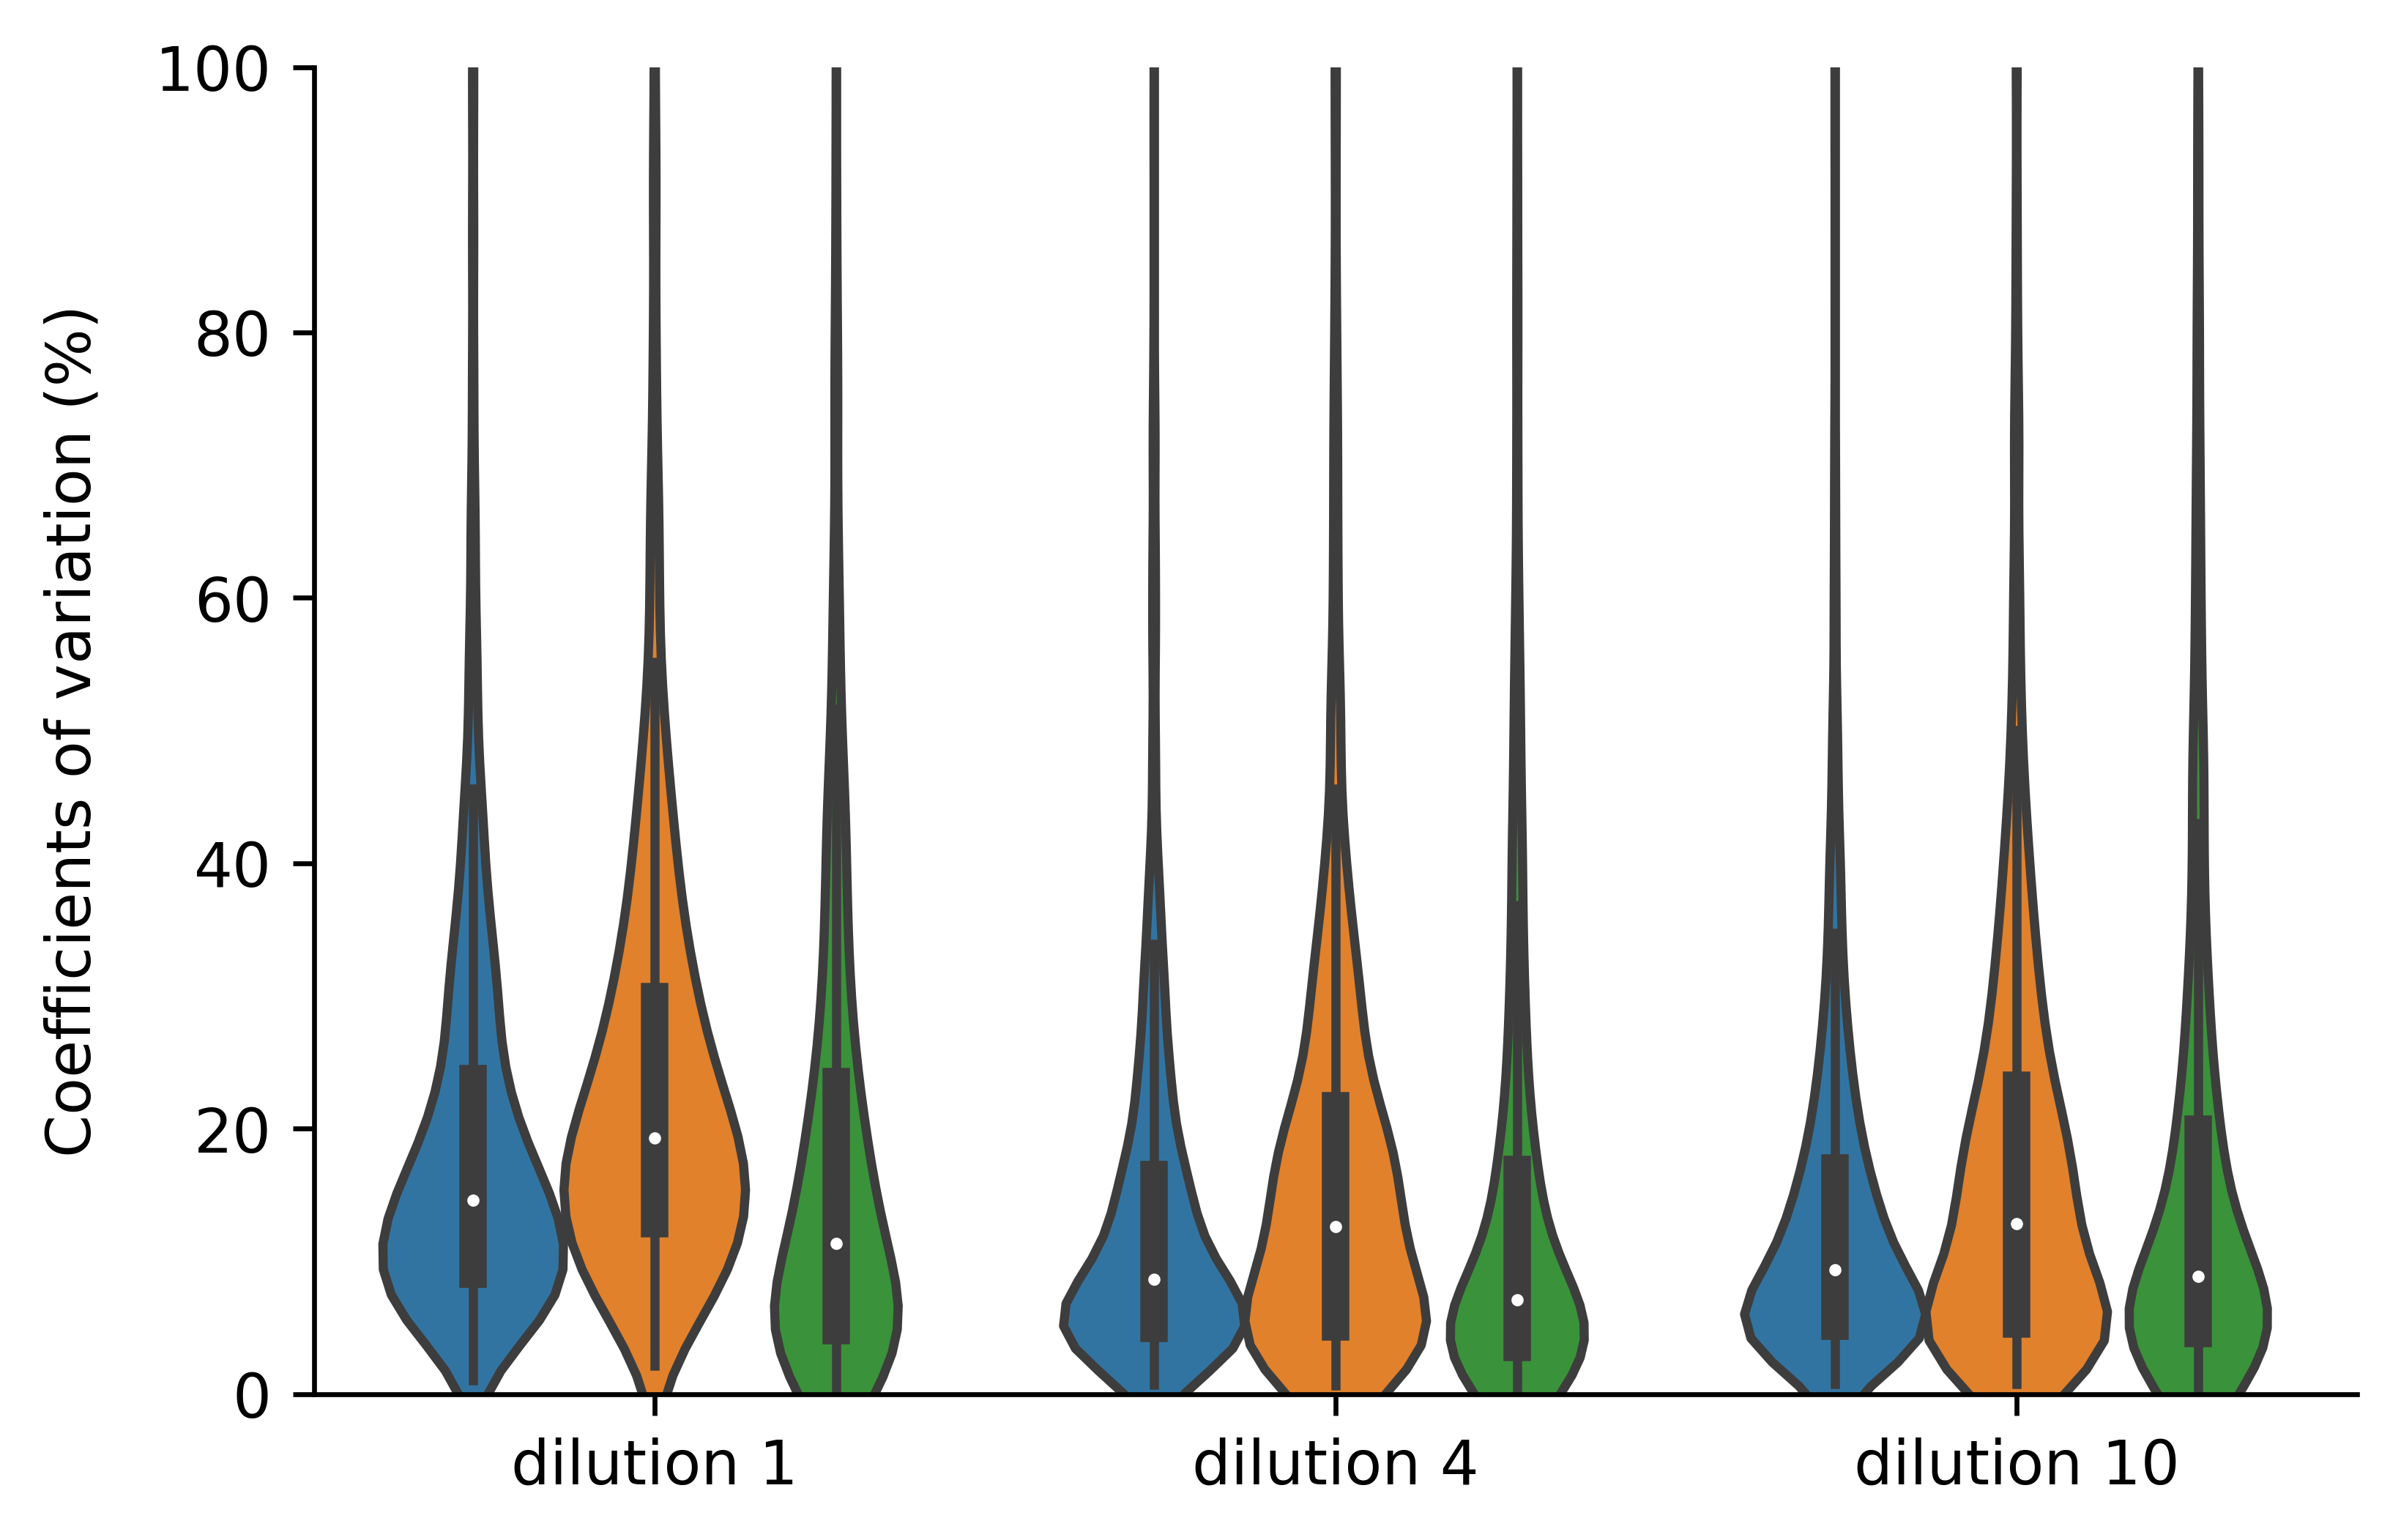

In [35]:
from pandas.api.types import CategoricalDtype

cat_size_order = CategoricalDtype(
    ['dilution 1', 'dilution 4', 'dilution 10'], 
    ordered=True
)

msstats_em_cv['Condition'] = msstats_em_cv['Condition'].astype(cat_size_order)


plt.figure(dpi=600)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0, 100)

# plt.title("Coefficients of variation (%)")
sns.violinplot(x = "Condition", y="CV[%]", data=msstats_em_cv, scale= "count", hue="Type")
ax.get_legend().remove()
plt.ylabel("Coefficients of variation (%)", labelpad=8.5)
plt.xlabel("", labelpad=8.5)
plt.show()


In [11]:
msstats_em_cv.groupby("Type")["CV[%]"].mean() 

Type
MSstats    14.818163
Proteus    19.259823
msqrob2    15.419041
Name: CV[%], dtype: float64

In [12]:
msstats_em_cv.groupby("Type")["CV[%]"].median()

Type
MSstats    10.736863
Proteus    15.310626
msqrob2     8.814474
Name: CV[%], dtype: float64

# Quantile

### MSstats

In [13]:
quantms_quantile_protein_expression = pd.read_csv("./MSstats_output-quantms-Q-proteinIntensity.csv", header=0, sep=",")

msstats_quantile_cv = pd.DataFrame(None,columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3', 'TechRep4', 'TechRep5', 'TechRep6', 'Type', "CV[%]", "Condition"])
for condition, group_condition in quantms_quantile_protein_expression.groupby("GROUP"):
    for protein, t_sum in group_condition.groupby("Protein"):
        if len(t_sum) < 3:
            continue
        TechRep1 = np.NaN
        TechRep2 = np.NaN
        TechRep3 = np.NaN
        TechRep4 = np.NaN
        TechRep5 = np.NaN
        TechRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if row["originalRUN"] == 1 or row["originalRUN"] == 7 or row["originalRUN"] == 13:
                TechRep1 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 2 or row["originalRUN"] == 8 or row["originalRUN"] == 14:
                TechRep2 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 3 or row["originalRUN"] == 9 or row["originalRUN"] == 15:
                TechRep3 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 4 or row["originalRUN"] == 10 or row["originalRUN"] == 16:
                TechRep4 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 5 or row["originalRUN"] == 11 or row["originalRUN"] == 17:
                TechRep5 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 6 or row["originalRUN"] == 12 or row["originalRUN"] == 18:
                TechRep6 = np.exp2(row["LogIntensities"])
        condition = condition.replace("SP=Yeast;CT=Mixture;QY=", "")
        mean = np.nanmean([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        std = np.nanstd([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        msstats_quantile_cv = msstats_quantile_cv.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, "TechRep4": TechRep4, "TechRep5": TechRep5, "TechRep6": TechRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "MSstats", "Condition": condition}, ignore_index=True)

### Proteus

In [14]:
import re

prodatquantile = pd.read_csv("./proteus-quantms-Q-proteinIntensity.csv", index_col=0)

def return_techrep(row):
    return row["MS runs"].replace("TechRep", "").split("_")[-1]

prodatquantile = prodatquantile.reset_index() #将索引转化为Series
prodatquantile_long = prodatquantile.melt(id_vars=["index"])
prodatquantile_long.rename(columns={"index": "ProteinName", "variable": "MS runs", "value": "Intensity"}, inplace=True)
prodatquantile_long.dropna(how="any", inplace=True)
prodatquantile_long["TechRep"] = prodatquantile_long.apply(lambda x: return_techrep(x), axis=1)
prodatquantile_long["Condition"] = prodatquantile_long.apply(lambda x: x["MS runs"].split("_")[0], axis=1)

In [15]:
for condition, group_condition in prodatquantile_long.groupby("Condition"):
    for protein, t_sum in group_condition.groupby("ProteinName"):
        if len(t_sum) < 3:
            continue
        TechRep1 = np.NaN
        TechRep2 = np.NaN
        TechRep3 = np.NaN
        TechRep4 = np.NaN
        TechRep5 = np.NaN
        TechRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if str(row["TechRep"]) == "1":
                TechRep1 = row["Intensity"]
            elif str(row["TechRep"]) == "2":
                TechRep2 = row["Intensity"]
            elif str(row["TechRep"]) == "3":
                TechRep3 = row["Intensity"]
            elif str(row["TechRep"]) == "4":
                TechRep4 = row["Intensity"]
            elif str(row["TechRep"]) == "5":
                TechRep5 = row["Intensity"]
            elif str(row["TechRep"]) == "6":
                TechRep6 = row["Intensity"]

        mean = np.nanmean([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        std = np.nanstd([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        msstats_quantile_cv = msstats_quantile_cv.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, "TechRep4": TechRep4, "TechRep5": TechRep5, "TechRep6": TechRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "Proteus", "Condition": condition}, ignore_index=True)

### msqrob2

In [16]:
msqrob2 = pd.read_csv("msqrob2-protein-intensity-Q.csv")
msqrob2 = msqrob2.melt(id_vars="ProteinName")
def put_condition(v):
    if v == "sumIntensity_1" or v == "sumIntensity_2" or v == "sumIntensity_3" or v == "sumIntensity_4"or v == "sumIntensity_5"or v == "sumIntensity_6":
        return "dilution 1"
    elif v == "sumIntensity_7" or v == "sumIntensity_8" or v == "sumIntensity_9"or v == "sumIntensity_10"or v == "sumIntensity_11"or v == "sumIntensity_12":
        return "dilution 4"
    else:
        return "dilution 10"

def convert_variable(v):
    if v == "sumIntensity_1" or v == "sumIntensity_7" or v == "sumIntensity_13":
        return "TechRep1"
    elif v == "sumIntensity_2" or v == "sumIntensity_8" or v == "sumIntensity_14":
        return "TechRep2"
    elif v == "sumIntensity_3" or  v == "sumIntensity_9"or v == "sumIntensity_15":
        return "TechRep3"
    elif v == "sumIntensity_4" or v == "sumIntensity_10"or v == "sumIntensity_16":
        return "TechRep4"
    elif v == "sumIntensity_5" or  v == "sumIntensity_11"or v == "sumIntensity_17":
        return "TechRep5"
    else:
        return "TechRep6"
    
msqrob2["Condition"] = msqrob2.apply(lambda x: put_condition(x["variable"]) ,axis=1)
msqrob2["variable"] = msqrob2.apply(lambda x: convert_variable(x["variable"]) ,axis=1)

msqrob2 = msqrob2.pivot_table(index=["ProteinName", "Condition"], columns=["variable"], values="value").reset_index()
msqrob2.dropna(thresh=3, subset=["TechRep1", "TechRep2","TechRep3", "TechRep4", "TechRep5", "TechRep6"], inplace=True, axis=0)


msqrob2["CV[%]"] =  msqrob2.apply(lambda r: get_cv(r), axis=1)
msqrob2["Type"] = "msqrob2"

In [17]:
msstats_quantile_cv["Condition"] = msstats_quantile_cv.apply(lambda x: "dilution " + str(x["Condition"]), axis=1)
msstats_quantile_cv = msstats_quantile_cv.append(msqrob2)

# 删除行中带有负数的行
msstats_quantile_cv = msstats_quantile_cv[msstats_quantile_cv.select_dtypes(include=[np.number]).ge(0).all(1)]

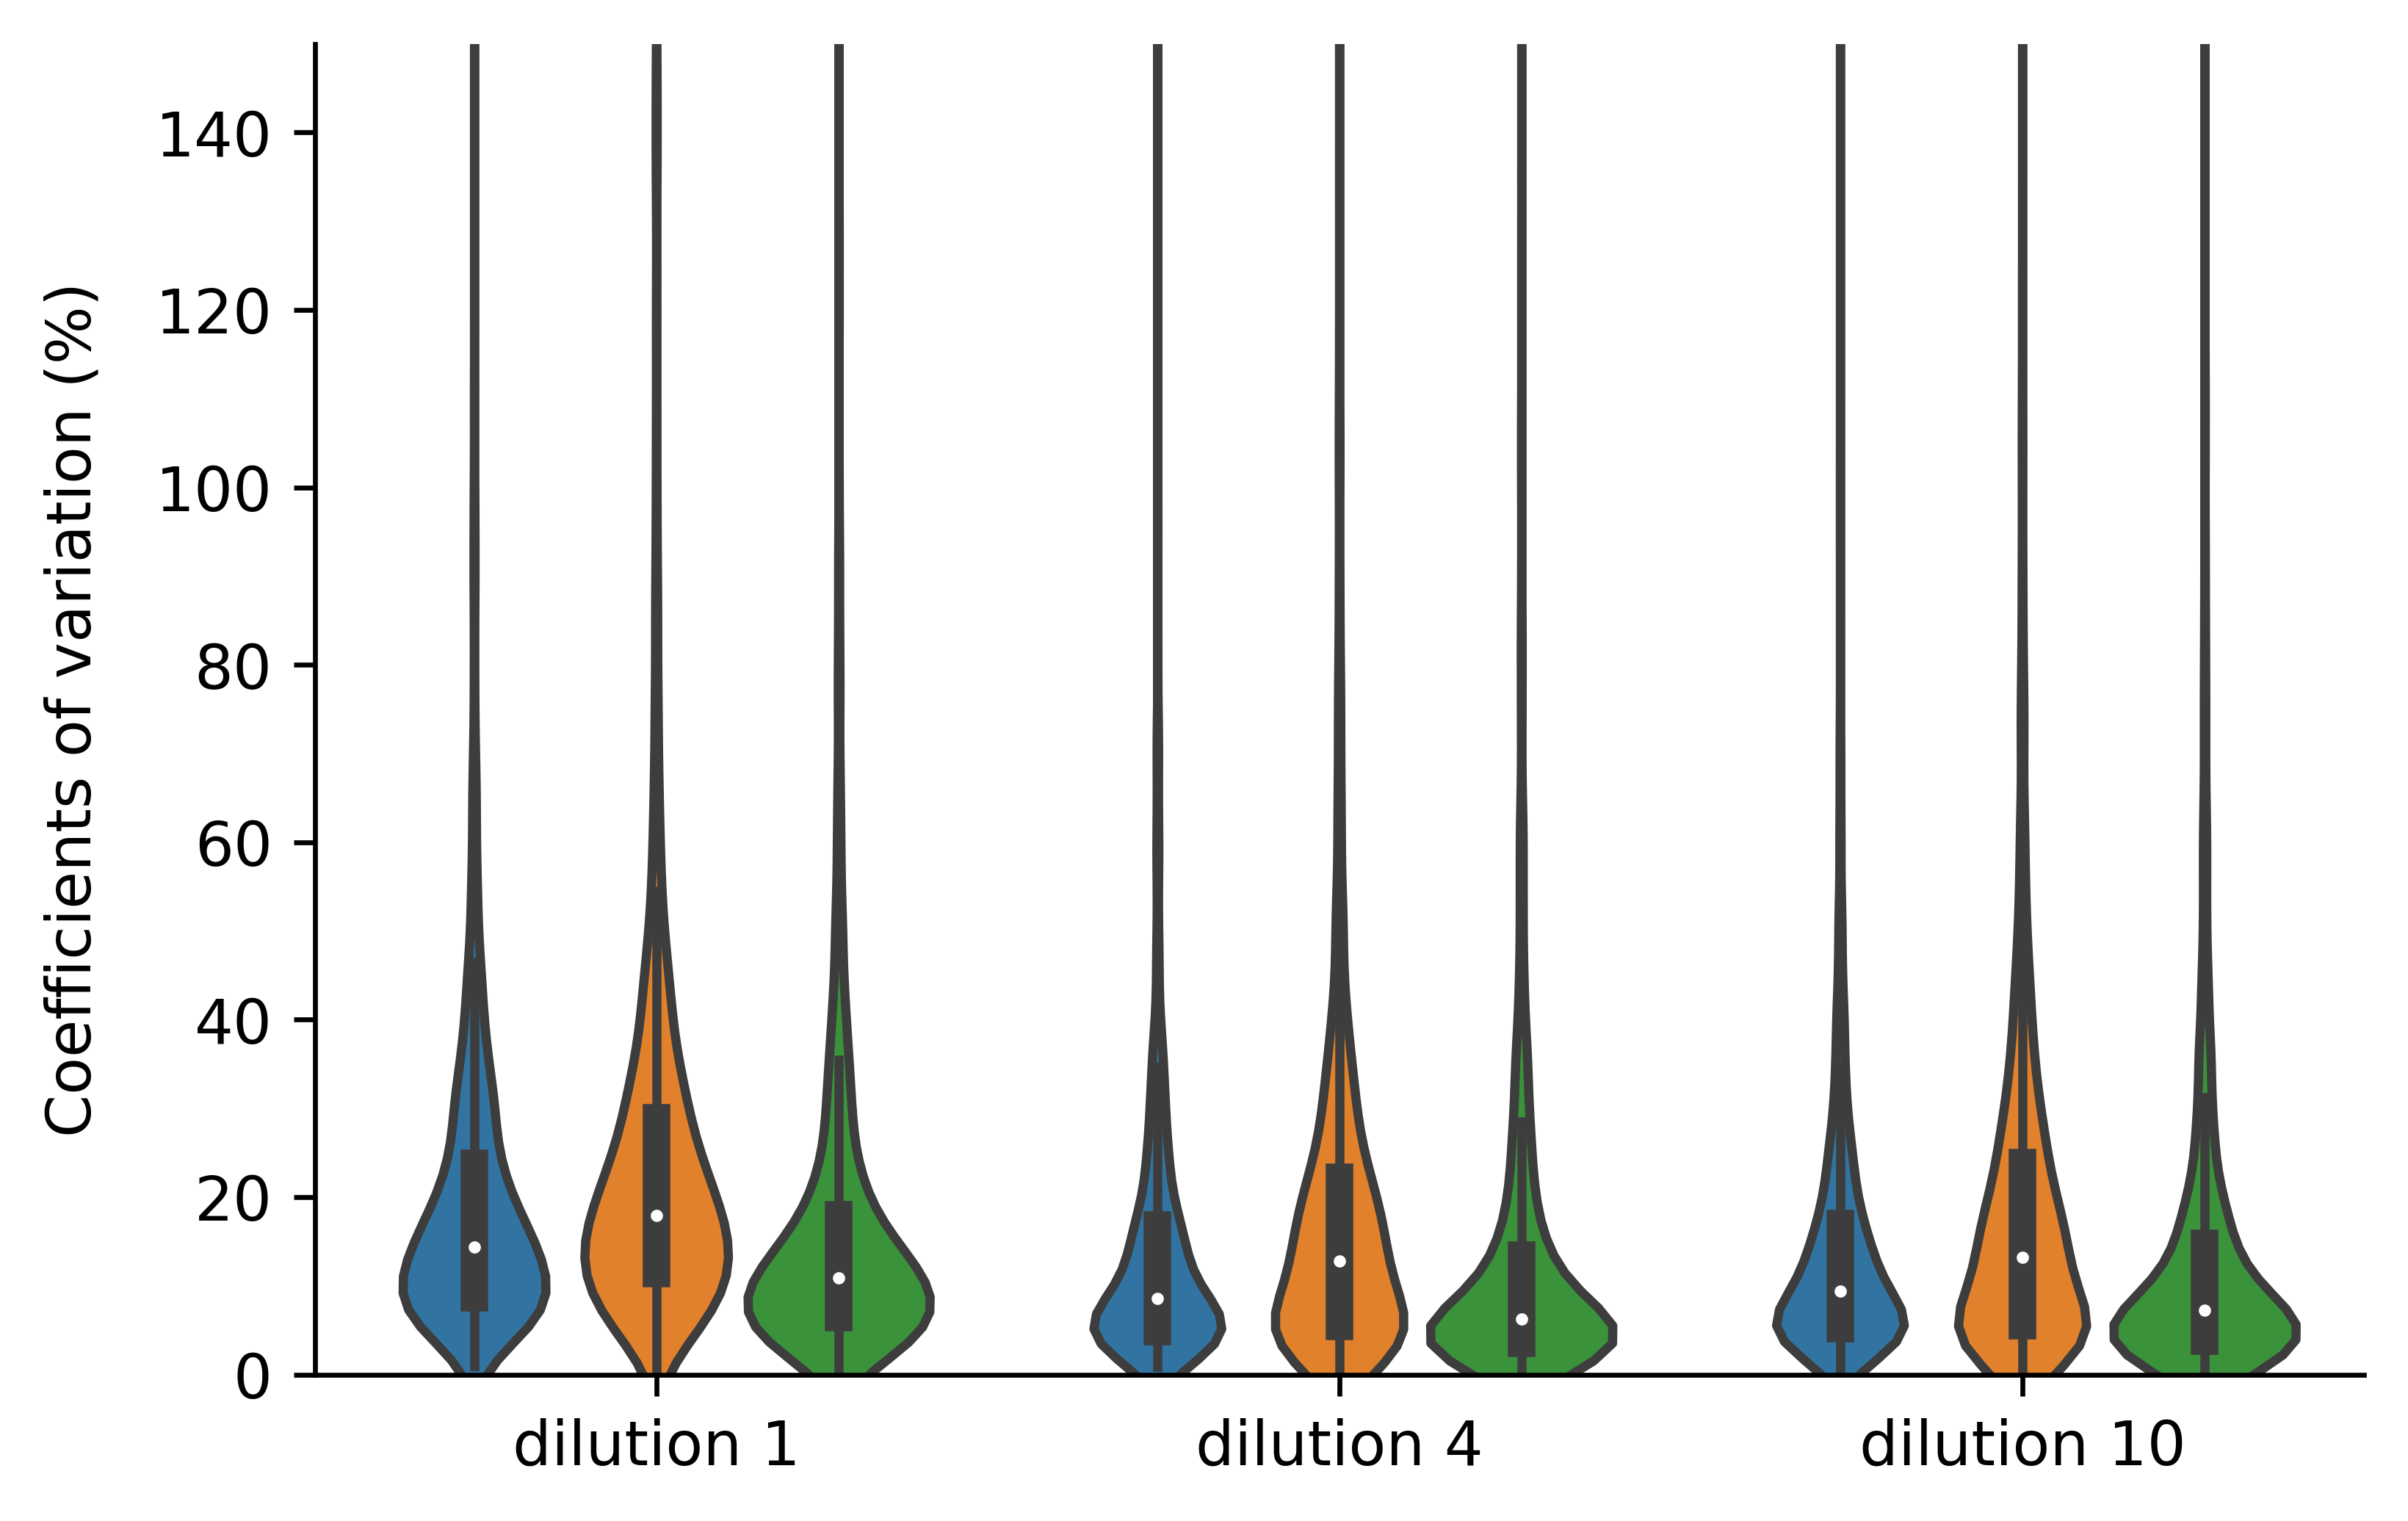

In [36]:
from pandas.api.types import CategoricalDtype

cat_size_order = CategoricalDtype(
    ['dilution 1', 'dilution 4', 'dilution 10'], 
    ordered=True
)

msstats_quantile_cv['Condition'] = msstats_quantile_cv['Condition'].astype(cat_size_order)


plt.figure(dpi=600)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0, 150)

# plt.title("Coefficients of variation (%)")
sns.violinplot(x = "Condition", y="CV[%]", data=msstats_quantile_cv, scale= "count", hue="Type")
ax.get_legend().remove()
plt.ylabel("Coefficients of variation (%)", labelpad=8.5)
plt.xlabel("", labelpad=8.5)
plt.show()


In [31]:
msstats_quantile_cv.groupby("Type")["CV[%]"].mean() 

Type
MSstats    14.799584
Proteus    19.018875
msqrob2    12.850527
Name: CV[%], dtype: float64

In [32]:
msstats_quantile_cv.groupby("Type")["CV[%]"].median()

Type
MSstats    10.690838
Proteus    14.716780
msqrob2     8.007221
Name: CV[%], dtype: float64

# NN

### MSstats

In [40]:
quantms_NN_protein_expression = pd.read_csv("./MSstats_output-quantms-NN-proteinIntensity.csv", header=0, sep=",")

msstats_nn_cv = pd.DataFrame(None,columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3', 'TechRep4', 'TechRep5', 'TechRep6', 'Type', "CV[%]", "Condition"])
for condition, group_condition in quantms_NN_protein_expression.groupby("GROUP"):
    for protein, t_sum in group_condition.groupby("Protein"):
        if len(t_sum) < 3:
            continue
        TechRep1 = np.NaN
        TechRep2 = np.NaN
        TechRep3 = np.NaN
        TechRep4 = np.NaN
        TechRep5 = np.NaN
        TechRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if row["originalRUN"] == 1 or row["originalRUN"] == 7 or row["originalRUN"] == 13:
                TechRep1 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 2 or row["originalRUN"] == 8 or row["originalRUN"] == 14:
                TechRep2 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 3 or row["originalRUN"] == 9 or row["originalRUN"] == 15:
                TechRep3 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 4 or row["originalRUN"] == 10 or row["originalRUN"] == 16:
                TechRep4 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 5 or row["originalRUN"] == 11 or row["originalRUN"] == 17:
                TechRep5 = np.exp2(row["LogIntensities"])
            elif row["originalRUN"] == 6 or row["originalRUN"] == 12 or row["originalRUN"] == 18:
                TechRep6 = np.exp2(row["LogIntensities"])
        condition = condition.replace("SP=Yeast;CT=Mixture;QY=", "")
        mean = np.nanmean([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        std = np.nanstd([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        msstats_nn_cv = msstats_nn_cv.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, "TechRep4": TechRep4, "TechRep5": TechRep5, "TechRep6": TechRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "MSstats", "Condition": condition}, ignore_index=True)

### Proteus

In [41]:
import re

prodat_nn = pd.read_csv("./proteus-quantms-NN-proteinIntensity.csv", index_col=0)

def return_techrep(row):
    return row["MS runs"].replace("TechRep", "").split("_")[-1]

prodat_nn = prodat_nn.reset_index() #将索引转化为Series
prodat_nn_long = prodat_nn.melt(id_vars=["index"])
prodat_nn_long.rename(columns={"index": "ProteinName", "variable": "MS runs", "value": "Intensity"}, inplace=True)
prodat_nn_long.dropna(how="any", inplace=True)
prodat_nn_long["TechRep"] = prodat_nn_long.apply(lambda x: return_techrep(x), axis=1)
prodat_nn_long["Condition"] = prodat_nn_long.apply(lambda x: x["MS runs"].split("_")[0], axis=1)

In [42]:
for condition, group_condition in prodat_nn_long.groupby("Condition"):
    for protein, t_sum in group_condition.groupby("ProteinName"):
        if len(t_sum) < 3:
            continue
        TechRep1 = np.NaN
        TechRep2 = np.NaN
        TechRep3 = np.NaN
        TechRep4 = np.NaN
        TechRep5 = np.NaN
        TechRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if str(row["TechRep"]) == "1":
                TechRep1 = row["Intensity"]
            elif str(row["TechRep"]) == "2":
                TechRep2 = row["Intensity"]
            elif str(row["TechRep"]) == "3":
                TechRep3 = row["Intensity"]
            elif str(row["TechRep"]) == "4":
                TechRep4 = row["Intensity"]
            elif str(row["TechRep"]) == "5":
                TechRep5 = row["Intensity"]
            elif str(row["TechRep"]) == "6":
                TechRep6 = row["Intensity"]

        mean = np.nanmean([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        std = np.nanstd([TechRep1, TechRep2, TechRep3, TechRep4, TechRep5, TechRep6])
        msstats_nn_cv = msstats_nn_cv.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, "TechRep4": TechRep4, "TechRep5": TechRep5, "TechRep6": TechRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "Proteus", "Condition": condition}, ignore_index=True)

In [43]:
msstats_nn_cv

,ProteinName,TechRep1,TechRep2,TechRep3,TechRep4,TechRep5,TechRep6,Type,CV[%],Condition
0,sp|A0FGR8|ESYT2_HUMAN,5.097414e+06,9.713364e+06,1.060904e+07,7.278919e+06,8.105394e+06,9.730095e+06,MSstats,22.011581,1
1,sp|A0JNW5|UH1BL_HUMAN,5.936200e+06,6.396357e+06,7.029277e+06,6.580726e+06,7.728403e+06,5.907058e+06,MSstats,9.628113,1
2,sp|A0MZ66|SHOT1_HUMAN,1.887136e+07,2.516518e+07,2.481998e+07,2.442836e+07,2.470781e+07,2.592942e+07,MSstats,9.738265,1
3,sp|A1L390|PKHG3_HUMAN,2.044870e+07,2.157401e+07,2.261879e+07,2.069859e+07,2.392606e+07,1.564426e+07,MSstats,12.463173,1
4,sp|A7KAX9|RHG32_HUMAN,1.804583e+07,1.674989e+07,1.650706e+07,1.944529e+07,1.571267e+07,2.496199e+07,MSstats,16.689038,1
...,...,...,...,...,...,...,...,...,...,...
9937,sp|Q9Y6K1|DNM3A_HUMAN,2.945577e+07,3.621967e+07,3.779764e+07,2.965657e+07,3.216869e+07,2.489090e+07,Proteus,13.715277,4
9938,sp|Q9Y6M7|S4A7_HUMAN,5.088520e+07,1.263457e+08,2.430087e+07,2.860234e+07,8.988217e+07,3.422378e+07,Proteus,62.984825,4
9939,sp|Q9Y6Q9|NCOA3_HUMAN,3.588470e+07,8.035672e+06,8.228722e+06,1.280055e+07,1.382083e+07,3.546577e+07,Proteus,62.797048,4
9940,sp|Q9Y6R0|NUMBL_HUMAN,6.839646e+07,6.503050e+07,7.163264e+07,6.565631e+07,6.182441e+07,6.683624e+07,Proteus,4.538730,4


### msqrob2

In [44]:
msqrob2 = pd.read_csv("msqrob2-protein-intensity-NN.csv")
msqrob2 = msqrob2.melt(id_vars="ProteinName")
def put_condition(v):
    if v == "sumIntensity_1" or v == "sumIntensity_2" or v == "sumIntensity_3" or v == "sumIntensity_4"or v == "sumIntensity_5"or v == "sumIntensity_6":
        return "dilution 1"
    elif v == "sumIntensity_7" or v == "sumIntensity_8" or v == "sumIntensity_9"or v == "sumIntensity_10"or v == "sumIntensity_11"or v == "sumIntensity_12":
        return "dilution 4"
    else:
        return "dilution 10"

def convert_variable(v):
    if v == "sumIntensity_1" or v == "sumIntensity_7" or v == "sumIntensity_13":
        return "TechRep1"
    elif v == "sumIntensity_2" or v == "sumIntensity_8" or v == "sumIntensity_14":
        return "TechRep2"
    elif v == "sumIntensity_3" or  v == "sumIntensity_9"or v == "sumIntensity_15":
        return "TechRep3"
    elif v == "sumIntensity_4" or v == "sumIntensity_10"or v == "sumIntensity_16":
        return "TechRep4"
    elif v == "sumIntensity_5" or  v == "sumIntensity_11"or v == "sumIntensity_17":
        return "TechRep5"
    else:
        return "TechRep6"
    
msqrob2["Condition"] = msqrob2.apply(lambda x: put_condition(x["variable"]) ,axis=1)
msqrob2["variable"] = msqrob2.apply(lambda x: convert_variable(x["variable"]) ,axis=1)

msqrob2 = msqrob2.pivot_table(index=["ProteinName", "Condition"], columns=["variable"], values="value").reset_index()
msqrob2.dropna(thresh=3, subset=["TechRep1", "TechRep2","TechRep3", "TechRep4", "TechRep5", "TechRep6"], inplace=True, axis=0)


msqrob2["CV[%]"] =  msqrob2.apply(lambda r: get_cv(r), axis=1)
msqrob2["Type"] = "msqrob2"

In [45]:
msstats_nn_cv["Condition"] = msstats_nn_cv.apply(lambda x: "dilution " + str(x["Condition"]), axis=1)
msstats_nn_cv = msstats_nn_cv.append(msqrob2)
msstats_nn_cv

,ProteinName,TechRep1,TechRep2,TechRep3,TechRep4,TechRep5,TechRep6,Type,CV[%],Condition
0,sp|A0FGR8|ESYT2_HUMAN,5.097414e+06,9.713364e+06,1.060904e+07,7.278919e+06,8.105394e+06,9.730095e+06,MSstats,22.011581,dilution 1
1,sp|A0JNW5|UH1BL_HUMAN,5.936200e+06,6.396357e+06,7.029277e+06,6.580726e+06,7.728403e+06,5.907058e+06,MSstats,9.628113,dilution 1
2,sp|A0MZ66|SHOT1_HUMAN,1.887136e+07,2.516518e+07,2.481998e+07,2.442836e+07,2.470781e+07,2.592942e+07,MSstats,9.738265,dilution 1
3,sp|A1L390|PKHG3_HUMAN,2.044870e+07,2.157401e+07,2.261879e+07,2.069859e+07,2.392606e+07,1.564426e+07,MSstats,12.463173,dilution 1
4,sp|A7KAX9|RHG32_HUMAN,1.804583e+07,1.674989e+07,1.650706e+07,1.944529e+07,1.571267e+07,2.496199e+07,MSstats,16.689038,dilution 1
...,...,...,...,...,...,...,...,...,...,...
7366,sp|Q9Y6X9|MORC2_HUMAN,4.025307e+07,4.001835e+07,4.702115e+07,5.416151e+07,5.647267e+07,5.781139e+07,msqrob2,14.832937,dilution 10
7367,sp|Q9Y6X9|MORC2_HUMAN,4.509701e+07,5.004777e+07,4.949922e+07,5.784663e+07,5.298182e+07,4.702947e+07,msqrob2,8.199390,dilution 4
7368,sp|Q9Y6Y8|S23IP_HUMAN,8.155878e+07,7.954709e+07,7.900313e+07,8.446130e+07,7.889381e+07,8.789517e+07,msqrob2,4.037146,dilution 1
7369,sp|Q9Y6Y8|S23IP_HUMAN,8.290514e+07,8.528440e+07,7.934596e+07,8.390265e+07,9.014592e+07,9.311829e+07,msqrob2,5.349286,dilution 10


In [46]:

# 删除行中带有负数的行
msstats_nn_cv = msstats_nn_cv[msstats_nn_cv.select_dtypes(include=[np.number]).ge(0).all(1)]


<ipython-input-47-464849adf8f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msstats_nn_cv['Condition'] = msstats_nn_cv['Condition'].astype(cat_size_order)


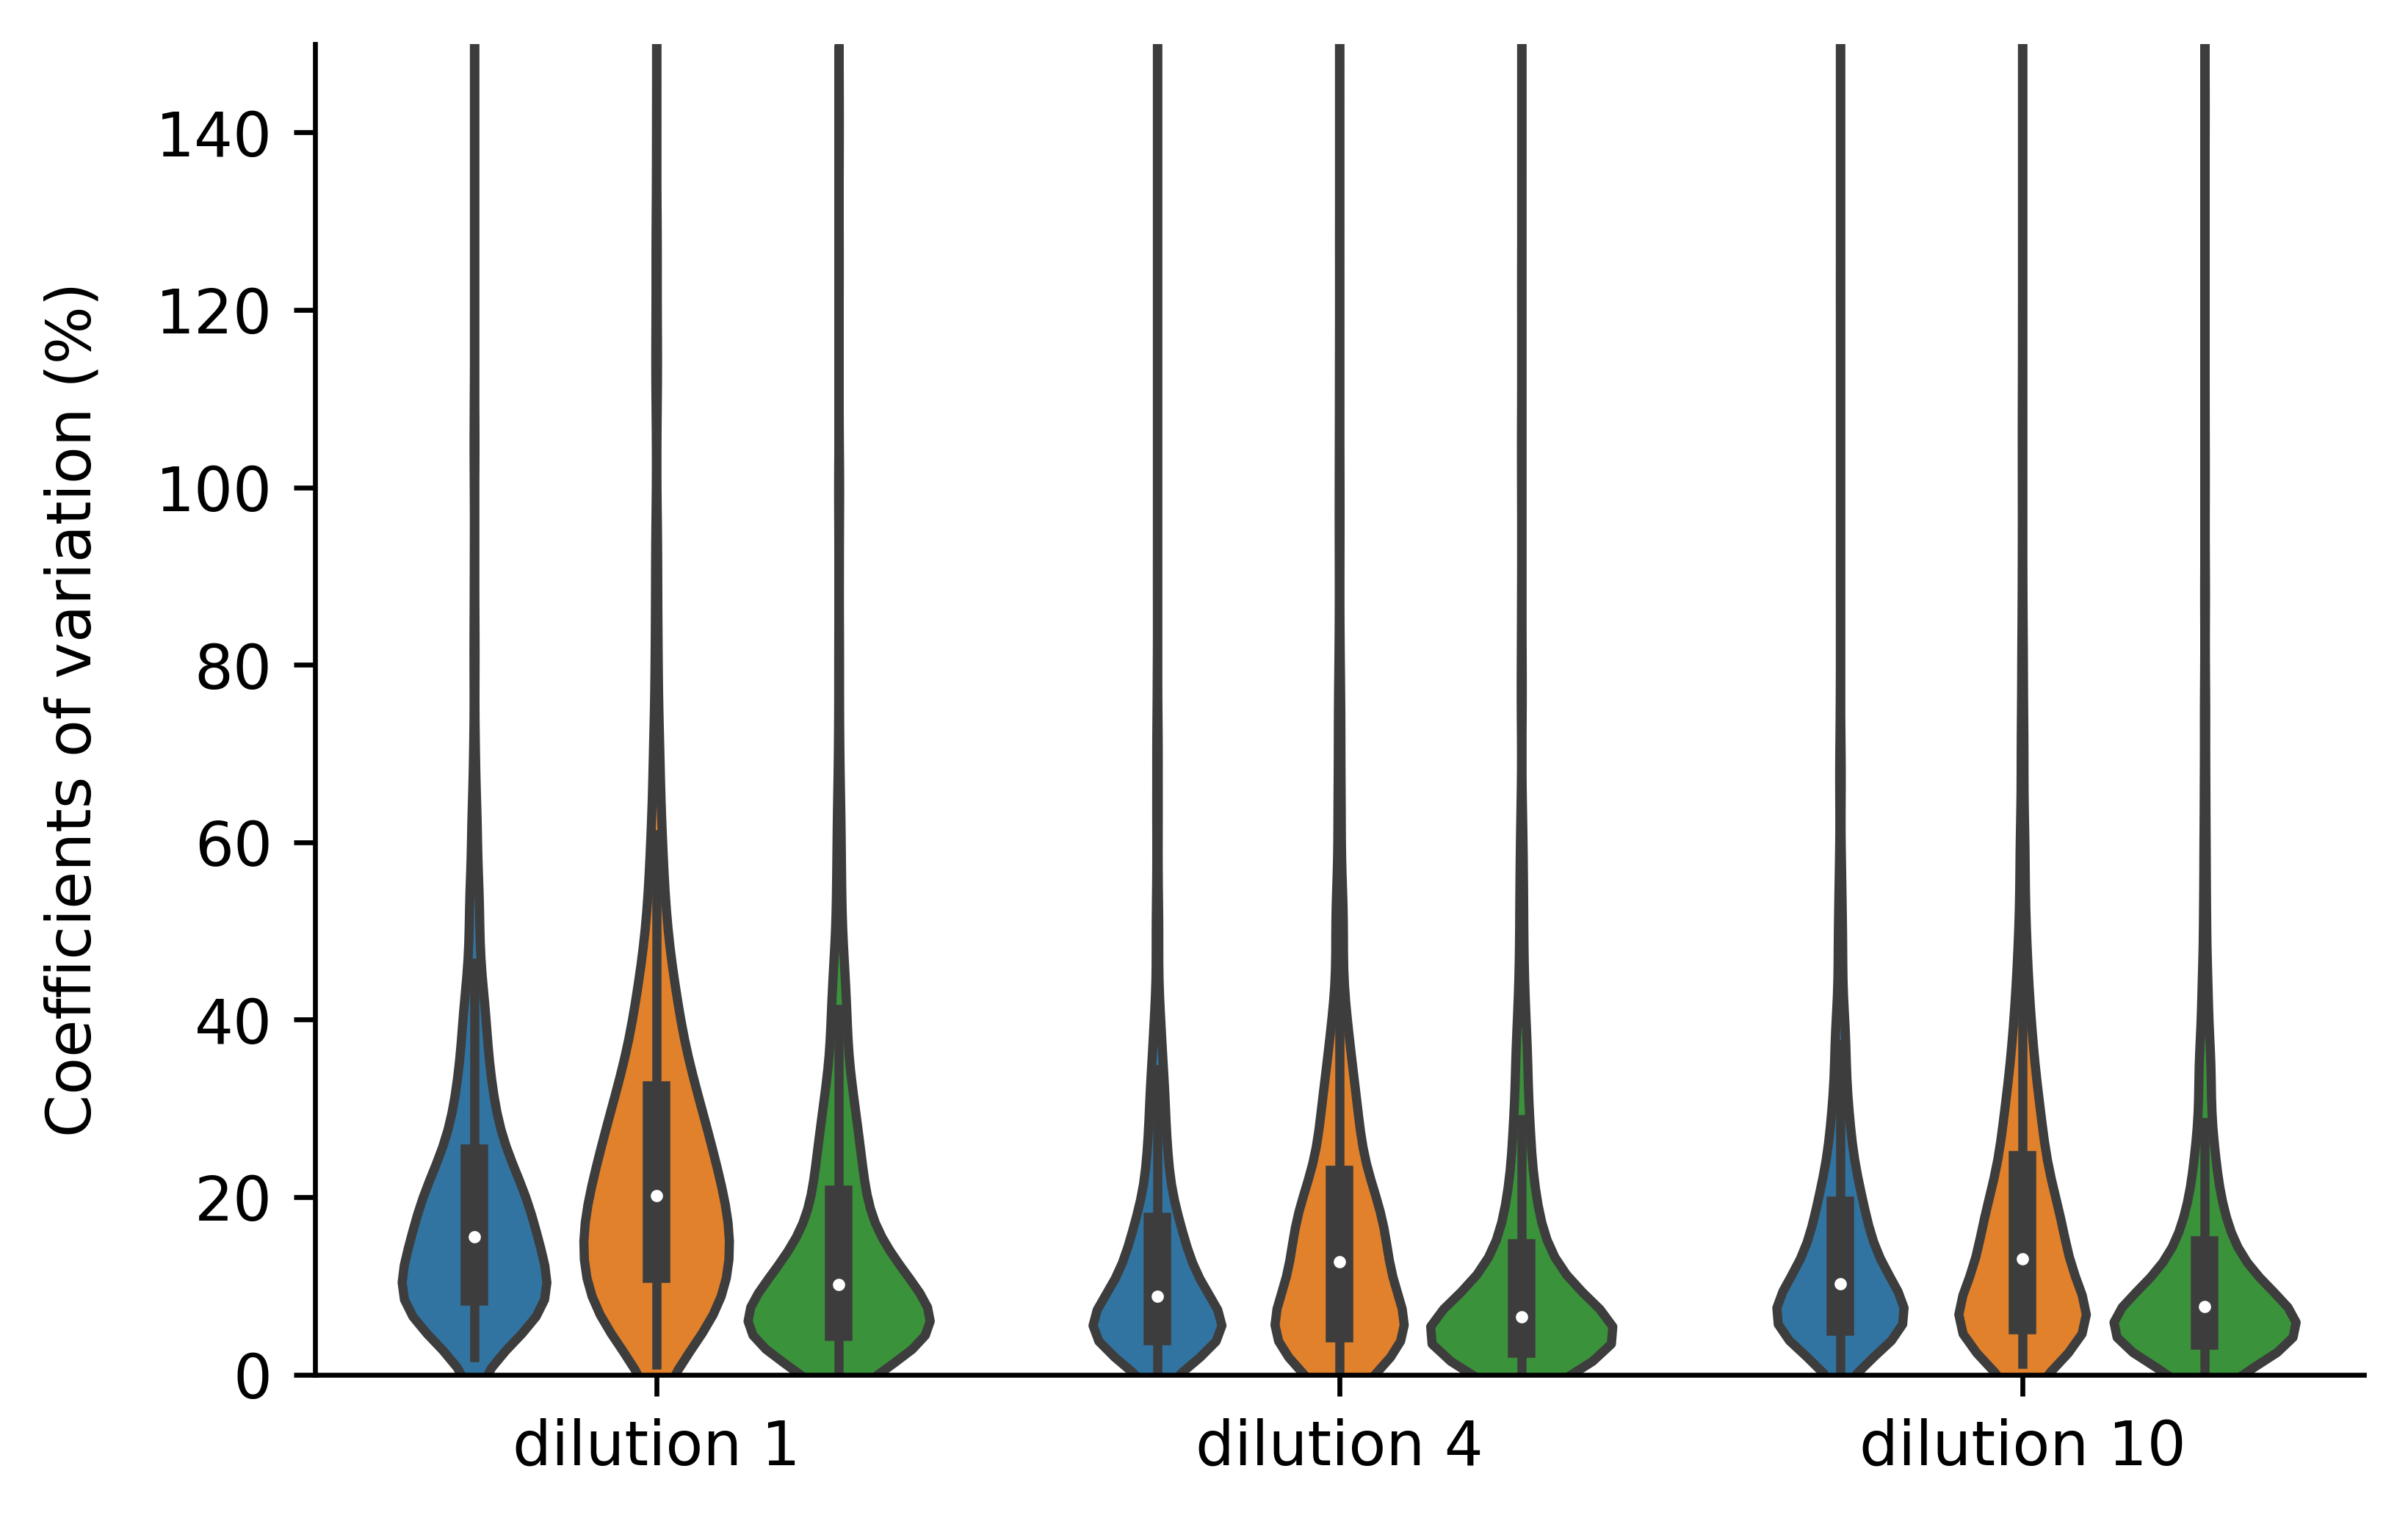

In [47]:
from pandas.api.types import CategoricalDtype

cat_size_order = CategoricalDtype(
    ['dilution 1', 'dilution 4', 'dilution 10'], 
    ordered=True
)


msstats_nn_cv['Condition'] = msstats_nn_cv['Condition'].astype(cat_size_order)


#plt.figure(dpi=500, figsize=(8,6))
plt.figure(dpi=600)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.title("Coefficients of variation (%)")
sns.violinplot(x = "Condition", y="CV[%]", data=msstats_nn_cv, scale= "count", hue="Type")
ax.get_legend().remove()
plt.ylabel("Coefficients of variation (%)", labelpad=8.5)
plt.xlabel("", labelpad=8.5)
plt.ylim(0, 150)
plt.show()


In [33]:
msstats_nn_cv.groupby("Type")["CV[%]"].mean() 

Type
MSstats    15.436823
Proteus    19.478824
msqrob2    12.788842
Name: CV[%], dtype: float64

In [34]:
msstats_nn_cv.groupby("Type")["CV[%]"].median()

Type
MSstats    11.301025
Proteus    15.249368
msqrob2     7.748349
Name: CV[%], dtype: float64